# Ensemble Methods

## Overview

## Table of Contents

## Setup

In [1]:
# Note: Trim out any of these that aren't used

import sys
import time
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn import ensemble
from sklearn import linear_model
from sklearn import metrics

print(time.strftime('%Y/%m/%d %H:%M'))
print('OS:', sys.platform)
print('Python:', sys.version)
print('NumPy:', np.__version__)
print('Pandas:', pd.__version__)

# Formatting for seaborn plots
sns.set_context('notebook', font_scale=1.1)
sns.set_style('ticks')

# Displays all dataframe columns
pd.set_option('display.max_columns', None)

%matplotlib inline

2018/06/30 18:42
OS: win32
Python: 3.5.5 | packaged by conda-forge | (default, Apr  6 2018, 16:03:44) [MSC v.1900 64 bit (AMD64)]
NumPy: 1.12.1
Pandas: 0.23.1


Creating an artificial data set

In [2]:
data = datasets.make_classification(n_samples=30000, n_features=20, n_classes=2, random_state=46)
X = data[0]
y = data[1]

df = pd.DataFrame(X)
df['label'] = y

df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,label
0,1.381152,0.098255,-1.595135,2.466205,1.199824,0.750711,0.016445,-1.022881,0.026676,-0.148218,0.670512,-1.162129,0.303519,0.764575,0.956223,-0.433387,-1.096477,1.491693,0.702132,-1.250404,0
1,-0.881437,0.932283,1.082720,0.336264,0.519846,-0.178198,-0.438511,-1.780458,-1.094684,0.704253,0.241305,0.412352,-0.185020,0.877690,0.887329,0.052146,-0.369928,0.420495,1.185006,-0.982993,0
2,0.190941,-1.388274,0.926709,-0.537074,-0.696138,-1.138702,-0.428135,2.043728,-1.091350,-0.178637,0.071443,0.767000,0.284925,1.302698,2.419633,0.634297,0.924794,1.733205,-0.317379,-0.836725,0
3,0.023706,0.054939,-1.256974,0.300998,0.631781,-1.202187,0.294900,-0.247984,0.738990,1.568707,0.143149,0.598339,0.066437,1.590112,-0.790207,-1.807635,0.065088,1.217465,1.054143,-0.129678,1
4,2.373467,-1.303648,-0.321453,1.455964,0.856350,-0.231027,0.408669,0.762471,0.988172,-0.572210,-1.023386,-0.909379,0.832970,0.612453,1.376857,0.502411,-2.524306,0.605981,0.764269,-1.158032,1


In [3]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=46)

In [4]:
# Function for plotting learning curves

In [5]:
# Data frame for gathering results 
results = pd.DataFrame(columns=['Accuracy', 'LogLoss', 'ExecutionTime', 'IsTuned'])

# Function for training a model and retrieving the results
def train_model_get_results(model, model_name, is_tuned=0):
    '''
    Trains a model and appends the results to the results dataframe
    
    Input:
        - model: The model with specified hyperparameters to be trained
        - model_name: The name of the model to be used as the index
        - is_tuned: A binary flag for if hyperparameter tuning has been performed
    
    Output: The results dataframe with the model results added
    
    Note: Only works with scikit-learn models
    '''
    
    # Collecting training time for results
    start_time = time.time()
    
    print('Training the model')
    model.fit(X_train, y_train)
    
    end_time = time.time()
    total_time = end_time - start_time
    print('Completed')
    
    # Calculating the testing set accuracy with the score method
    accuracy = model.score(X_test, y_test)
    
    # Calcuating the log loss with predicted probabilities
    class_probabilities = model.predict_proba(X_test)
    log_loss = metrics.log_loss(y_test, class_probabilities)
    
    # Adding the model results to the results dataframe
    model_results = [accuracy, log_loss, total_time, is_tuned]
    results.loc[model_name] = model_results
    
    return results

## Baseline

It's always useful to have a baseline to compare against. I like to use linear/logistic regression due to them being extremely fast to train.

Say something about wanting to be better than random chance or something

In [6]:
# Instantiating the model
logistic_regression = linear_model.LogisticRegression()

# Using our user defined function to train the model and return the results
train_model_get_results(model=logistic_regression, model_name='Logistic Regression')

Training the model
Completed


,Accuracy,LogLoss,ExecutionTime,IsTuned
Logistic Regression,0.880556,0.2974,0.093744,0.0


## Bagging

In [7]:
random_forest = ensemble.RandomForestClassifier(n_jobs=-1)  # n_jobs=-1 uses all available cores

train_model_get_results(random_forest, model_name='Random Forest')

Training the model
Completed


,Accuracy,LogLoss,ExecutionTime,IsTuned
Logistic Regression,0.880556,0.297400,0.093744,0.0
Random Forest,0.924111,0.479334,0.765581,0.0


In [8]:
# ensemble.BaggingRegressor?
# ensemble.ExtraTreesRegressor?
# ensemble.IsolationForest?
# ensemble.VotingClassifier?

## Boosting

In [9]:
adaptive_boosting = ensemble.AdaBoostClassifier()

train_model_get_results(adaptive_boosting, model_name='AdaBoost')

Training the model
Completed


,Accuracy,LogLoss,ExecutionTime,IsTuned
Logistic Regression,0.880556,0.297400,0.093744,0.0
Random Forest,0.924111,0.479334,0.765581,0.0
AdaBoost,0.888000,0.658270,4.796587,0.0


In [10]:
gradient_boosting = ensemble.GradientBoostingClassifier()

train_model_get_results(gradient_boosting, model_name='Gradient Boosted Trees')

Training the model
Completed


,Accuracy,LogLoss,ExecutionTime,IsTuned
Logistic Regression,0.880556,0.297400,0.093744,0.0
Random Forest,0.924111,0.479334,0.765581,0.0
AdaBoost,0.888000,0.658270,4.796587,0.0
Gradient Boosted Trees,0.912889,0.204186,6.952721,0.0


## Stacking

# Hyperparameter Tuning

Talk about grid search vs. random search

Talk about decision tree structure & hyperparameters

https://github.com/Microsoft/LightGBM/blob/master/docs/Parameters-Tuning.rst

For Faster Speed

    Use bagging by setting bagging_fraction and bagging_freq
    Use feature sub-sampling by setting feature_fraction
    Use small max_bin
    Use save_binary to speed up data loading in future learning
    Use parallel learning, refer to Parallel Learning Guide

For Better Accuracy

    Use large max_bin (may be slower)
    Use small learning_rate with large num_iterations
    Use large num_leaves (may cause over-fitting)
    Use bigger training data
    Try dart

Deal with Over-fitting

    Use small max_bin
    Use small num_leaves
    Use min_data_in_leaf and min_sum_hessian_in_leaf
    Use bagging by set bagging_fraction and bagging_freq
    Use feature sub-sampling by set feature_fraction
    Use bigger training data
    Try lambda_l1, lambda_l2 and min_gain_to_split for regularization
    Try max_depth to avoid growing deep tree


## Baseline

In [13]:
# TODO: Change this into a function

parameters = {'C': scipy.stats.uniform()}  # Between 0 and 1

random_search = RandomizedSearchCV(logistic_regression,
                                   param_distributions=parameters,
                                   n_iter=50, n_jobs=-1,
                                   return_train_score=True)
random_search.fit(X, y)

# summarize the results of the random parameter search
print(random_search.best_score_)
print(random_search.best_estimator_.C)

print(random_search.best_estimator_)

model_results = []

0.883
0.621595175805
LogisticRegression(C=0.62159517580541013, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


In [12]:
# def random_search_get_results(model, parameters, )

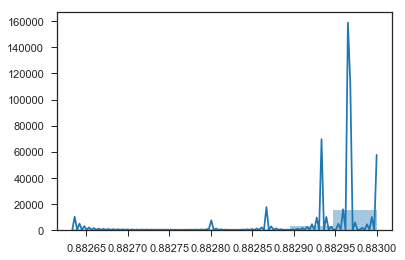

In [14]:
sns.distplot(random_search.cv_results_['mean_test_score'])

# Additional Frameworks

### XGBoost

#### Hyperparameter Tuning

### LightGBM

In [15]:
import lightgbm as lgb

lightgbm = lgb.LGBMClassifier(nthread=-1)  # nthread=-1 uses all available cores

# Due to the scikit-learn API option, LightGBM works with our function!
train_model_get_results(lightgbm, 'LightGBM')

Training the model
Completed


,Accuracy,LogLoss,ExecutionTime,IsTuned
Logistic Regression,0.880556,0.297400,0.093744,0.0
Random Forest,0.924111,0.479334,0.765581,0.0
AdaBoost,0.888000,0.658270,4.796587,0.0
Gradient Boosted Trees,0.912889,0.204186,6.952721,0.0
LightGBM,0.929111,0.311384,0.140618,0.0


#### Hyperparameter Tuning

### h2o

#### Hyperparameter Tuning